In [1]:
import data

In [2]:
samples = data.read_samples()
print('Total: {}'.format(len(samples)))

samples.head()

Total: 23577


,center,left,right,steering,throttle,brake,speed
0,/Users/tangrui/Code/Udacity/nd013 - Self-Drivi...,/Users/tangrui/Code/Udacity/nd013 - Self-Drivi...,/Users/tangrui/Code/Udacity/nd013 - Self-Drivi...,0.0,0.0,0,0.000003
1,/Users/tangrui/Code/Udacity/nd013 - Self-Drivi...,/Users/tangrui/Code/Udacity/nd013 - Self-Drivi...,/Users/tangrui/Code/Udacity/nd013 - Self-Drivi...,0.0,0.0,0,0.000004
2,/Users/tangrui/Code/Udacity/nd013 - Self-Drivi...,/Users/tangrui/Code/Udacity/nd013 - Self-Drivi...,/Users/tangrui/Code/Udacity/nd013 - Self-Drivi...,0.0,0.0,0,0.000001
3,/Users/tangrui/Code/Udacity/nd013 - Self-Drivi...,/Users/tangrui/Code/Udacity/nd013 - Self-Drivi...,/Users/tangrui/Code/Udacity/nd013 - Self-Drivi...,0.0,0.0,0,0.000001
4,/Users/tangrui/Code/Udacity/nd013 - Self-Drivi...,/Users/tangrui/Code/Udacity/nd013 - Self-Drivi...,/Users/tangrui/Code/Udacity/nd013 - Self-Drivi...,0.0,0.0,0,0.000003


In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

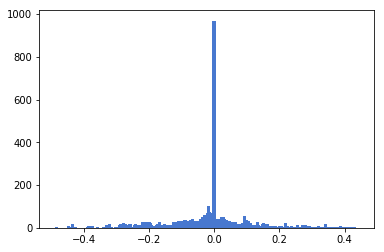

In [4]:
with plt.style.context(('seaborn-muted')):
    hist = samples.steering.value_counts()
    plt.bar(hist.index, hist.values, width=0.01)
    plt.show()

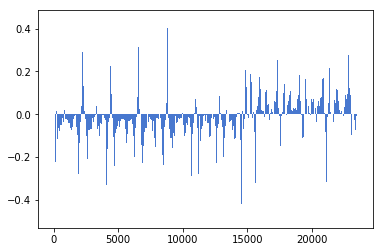

In [5]:
with plt.style.context(('seaborn-muted')):
    plt.bar(samples.steering.index, samples.steering.values, width=1)
    plt.show()

In [6]:
import numpy as np

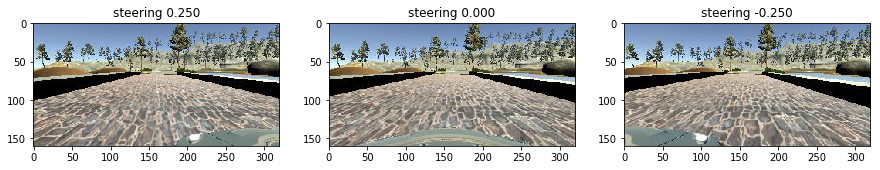

In [7]:
rand = np.random.randint(len(samples))
sample = samples.iloc[rand]
center_path = data.transform_image_path(sample.center)
left_path = data.transform_image_path(sample.left)
right_path = data.transform_image_path(sample.right)
center_image = mpimg.imread(center_path)
left_image = mpimg.imread(left_path)
right_image = mpimg.imread(right_path)
plt.figure(figsize=(15, 30))
gs = gridspec.GridSpec(1, 3)
plt.subplot(gs[0])
plt.imshow(left_image)
plt.title('steering {:.3f}'.format(sample.steering + data.ANGLE_CORRECTION))
plt.subplot(gs[1])
plt.imshow(center_image)
plt.title('steering {:.3f}'.format(sample.steering))
plt.subplot(gs[2])
plt.imshow(right_image)
plt.title('steering {:.3f}'.format(sample.steering - data.ANGLE_CORRECTION))

In [8]:
def plot_samples(images, angles):
    plt.figure(figsize=(10, 6))
    gs = gridspec.GridSpec(4, 4)

    for i, angle in enumerate(angles):
        image = images[i]
        if i == 0:
            print('image shape = {}'.format(image.shape))
        
        plt.subplot(gs[i])
        plt.imshow(image)
        plt.title('{:.3f}'.format(angle))
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')

    plt.show()

In [9]:
from sklearn.model_selection import train_test_split

train_samples, valid_samples = train_test_split(samples, test_size=0.2)

image shape = (160, 320, 3)


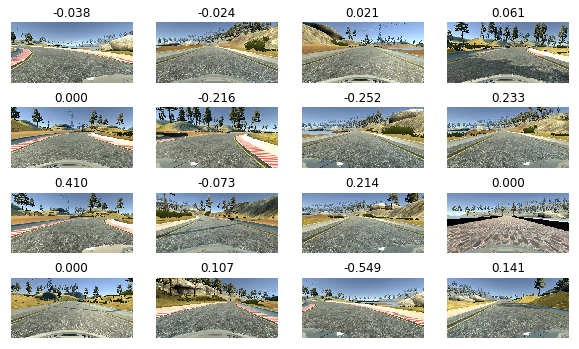

In [10]:
choices = np.random.choice(len(train_samples), 16)
paths = []
images = []
angles = []

for idx in choices:
    sample = train_samples.iloc[idx]
    path, angle = data.randomly_choose_camera(sample)
    paths.append(path)
    images.append(mpimg.imread(path))
    angles.append(angle)
    
plot_samples(images, angles)

image shape = (160, 320, 3)


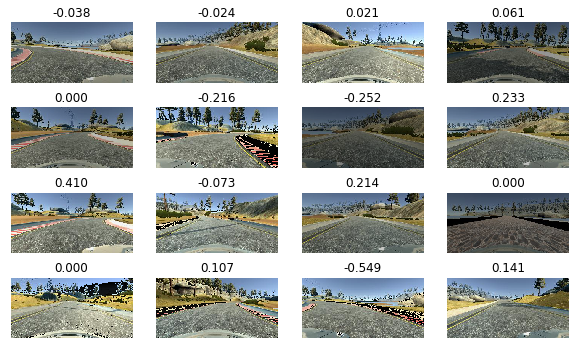

In [11]:
cb_images = []
for image in images:
    cb_images.append(data.change_brightness(image))
plot_samples(cb_images, angles)

image shape = (160, 320, 3)


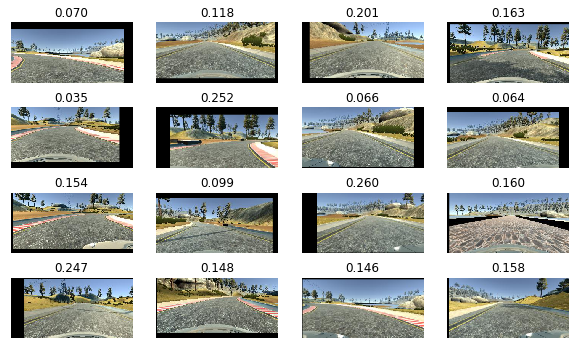

In [12]:
tr_images = []
tr_angles = []
for image in images:
    x_trans = data.generate_x_trans()
    tr_images.append(data.translate_image(image, x_trans))
    tr_angles.append(data.translate_angle(angle, x_trans))
plot_samples(tr_images, tr_angles)

image shape = (160, 320, 3)


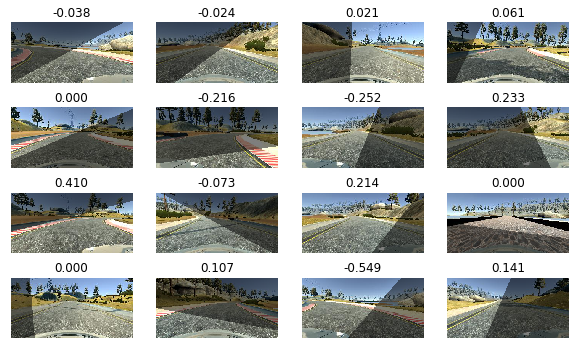

In [13]:
sh_images = []
for image in images:
    sh_images.append(data.add_random_shadow(image))
plot_samples(sh_images, angles)

image shape = (160, 320, 3)


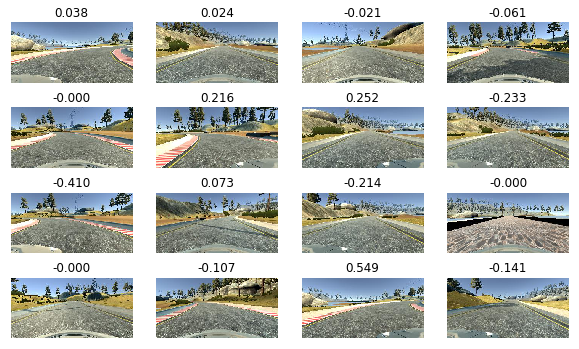

In [14]:
fp_images = []
fp_angles = []
for i, image in enumerate(images):
    img, ang = data.flip(image, angles[i])
    fp_images.append(img)
    fp_angles.append(ang)
plot_samples(fp_images, fp_angles)

image shape = (66, 200, 3)


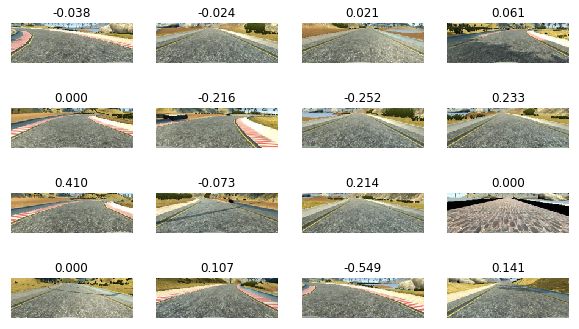

In [15]:
pp_images = []
for image in images:
    pp_images.append(data.preprocess(image))
plot_samples(pp_images, angles)

image shape = (66, 200, 3)


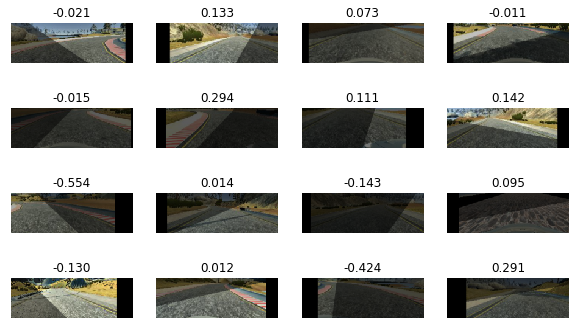

In [16]:
aug_images = []
aug_angles = []
for i, path in enumerate(paths):
    image, angle = data.augment(path, angles[i], 1, 1)
    aug_images.append(image)
    aug_angles.append(angle)
plot_samples(aug_images, aug_angles)

image shape = (66, 200, 3)


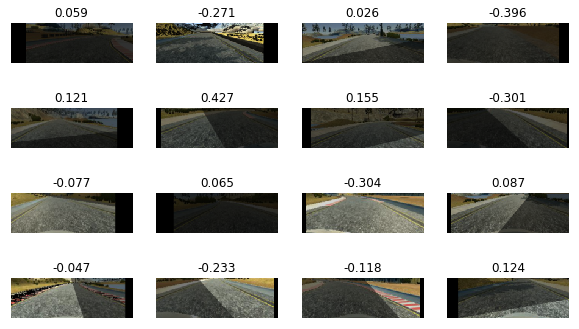

In [17]:
g = data.train_data_generator(train_samples, 1, 16)
aug_images, aug_angles = next(g)
plot_samples(aug_images, aug_angles)

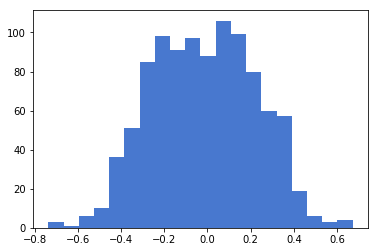

In [18]:
gen_angles = []
for _ in range(100):
    _, angles = next(data.train_data_generator(train_samples, 1, 10))
    gen_angles.extend(angles)

with plt.style.context(('seaborn-muted')):
    plt.hist(gen_angles, bins='auto')
    plt.show()